### Inferencia estadística vs Aprendizaje de máquinas

(Adaptado de  Viviana Acquaviva (2023))

In [130]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [132]:
#parámetros para generar figuras de alta calidad
font = {'size'   : 12}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 
matplotlib.rcParams.update({'figure.autolayout': False})
matplotlib.rcParams['figure.dpi'] = 300

Generaremos datos que sigan una relación lineal (con ruido) y usaremos una grilla para encontrar el mejor ajuste, sin y con considerar incertezas

In [135]:
np.random.seed(16) #semilla fija para reproducibilidad

x = np.arange(10) 

y = 2*x + 5 + np.random.randn(10) #generamos datos con scatter gausiano

Podemos considerar que los datos corresponden al movimiento de un auto con rapidez constante, donde $x$ es tiempo (en segundos) e $y$ es distancia (en metros)

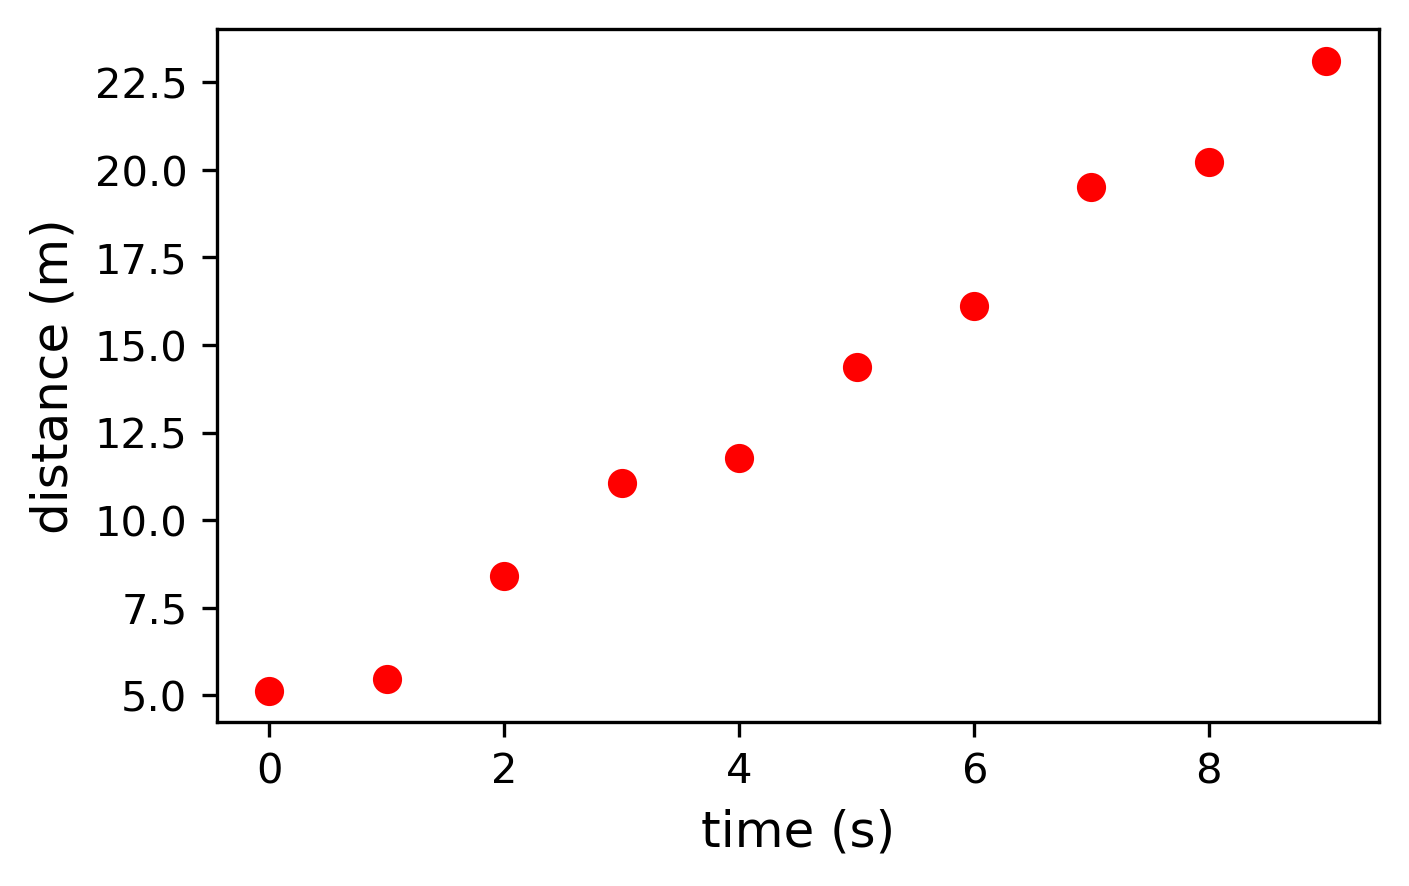

In [138]:
plt.figure(figsize=(5,3)) #
plt.scatter(x,y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)');

In [140]:
type(y)

numpy.ndarray

In [142]:
y = np.round(y,1) #redondeamos los datos

Suponga que a partir de esos datos debe ser capaz de decir la distancia a la que estará el auto cuando $t=12$ s. ¿Cómo podemos resolver el problema?

### Inferencia

Ya sabemos que la relación entre distancia y tiempo, para una partícula con rapidez constante está dada por $$d=d_0 +vt$$. Este modelo tienen dos parámetros: $d_0$ u $v$. Necesitamos encontrar estos parámetros para poder usar el modelo y determinar $d(t=12 s)$.

Primero, a partir de la figura, decidimos un rango razonable y generaremos una grilla de pendientes e interceptos.

In [150]:
slopes = np.linspace(1,3,101) # 101 es para que los números se vean mas "lindos"

intercepts = np.linspace(4,6,101)

In [152]:
len(slopes)

101

In [41]:
len(intercepts)

101

In [156]:
intercepts

array([4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18, 4.2 ,
       4.22, 4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 , 4.42,
       4.44, 4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62, 4.64,
       4.66, 4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84, 4.86,
       4.88, 4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04, 5.06, 5.08,
       5.1 , 5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26, 5.28, 5.3 ,
       5.32, 5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48, 5.5 , 5.52,
       5.54, 5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 , 5.72, 5.74,
       5.76, 5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92, 5.94, 5.96,
       5.98, 6.  ])

#### Note que estos ya son  > 10000 modelos (curse of dimensionality!)

Por conveniencia, definiremos dos funciones. La primera implementa nuestro modelo de línea recta y la segunda es la suma de errores, que consideramos la suma al cuadrado de las distancia entre las distancias predichas por el el modelo ($D^m_i$) y las observadas ($D^o_i$) $$\sum_{i=1}^{10}(D^m(d_0,v,x_i)-D^o_i)^2$$

In [158]:
def model(x,m,b):
    return m*x+b #complete el modelo

def se(x,m,b,yobs):
    return np.sum((yobs-model(x,m,b))**2) #complete el modelo

Ahora calcularemos el error cuadrado para cada valor y lo guardaremos en el arreglo "square_errs" 

In [160]:
square_errs = np.zeros((101,101)) #Inicialización

In [162]:
for i, m in enumerate(slopes):
    for j,b in enumerate(intercepts):
        square_errs[i,j] = se(x,m,b,y)

In [164]:
square_errs

array([[346.34 , 344.336, 342.34 , ..., 187.972, 186.752, 185.54 ],
       [333.958, 331.99 , 330.03 , ..., 179.118, 177.934, 176.758],
       [321.804, 319.872, 317.948, ..., 170.492, 169.344, 168.204],
       ...,
       [216.588, 218.112, 219.644, ..., 403.964, 406.272, 408.588],
       [226.55 , 228.11 , 229.678, ..., 417.454, 419.798, 422.15 ],
       [236.74 , 238.336, 239.94 , ..., 431.172, 433.552, 435.94 ]])

In [166]:
square_errs = np.array([[se(x,m,b,y) for b in intercepts] for m in slopes]) 

In [168]:
square_errs.shape 

(101, 101)

In [170]:
square_errs

array([[346.34 , 344.336, 342.34 , ..., 187.972, 186.752, 185.54 ],
       [333.958, 331.99 , 330.03 , ..., 179.118, 177.934, 176.758],
       [321.804, 319.872, 317.948, ..., 170.492, 169.344, 168.204],
       ...,
       [216.588, 218.112, 219.644, ..., 403.964, 406.272, 408.588],
       [226.55 , 228.11 , 229.678, ..., 417.454, 419.798, 422.15 ],
       [236.74 , 238.336, 239.94 , ..., 431.172, 433.552, 435.94 ]])

En este arreglo, el primer índice corresponde a las pendientes y el segundo, a los interceptos.

#### Para encontrar el mejor modelos, debemos encontrar el modelo que tiene el error cuadrado más bajo (el mejor ajuste)

In [172]:
np.argmin(square_errs) #índice del mínimo, si el arreglo fuera "flat"

5269

In [174]:
indices = np.unravel_index(square_errs.argmin(), square_errs.shape) #índices del mínimo, como tupla (fila, columna) 

print(indices)

(52, 17)


Con esto, derivamos la pendiente e intercepto del mejor modelo ajustado

In [176]:
bestm, bestb = slopes[indices[0]],intercepts[indices[1]]

In [178]:
bestm, bestb 

(2.04, 4.34)

**Pregunta: Con este modelo, cuánto es $d(t=12s)$?**

In [180]:
d12=2.04*12+4.34
print(d12)

28.82


Graficamos el mejor ajuste con los datos

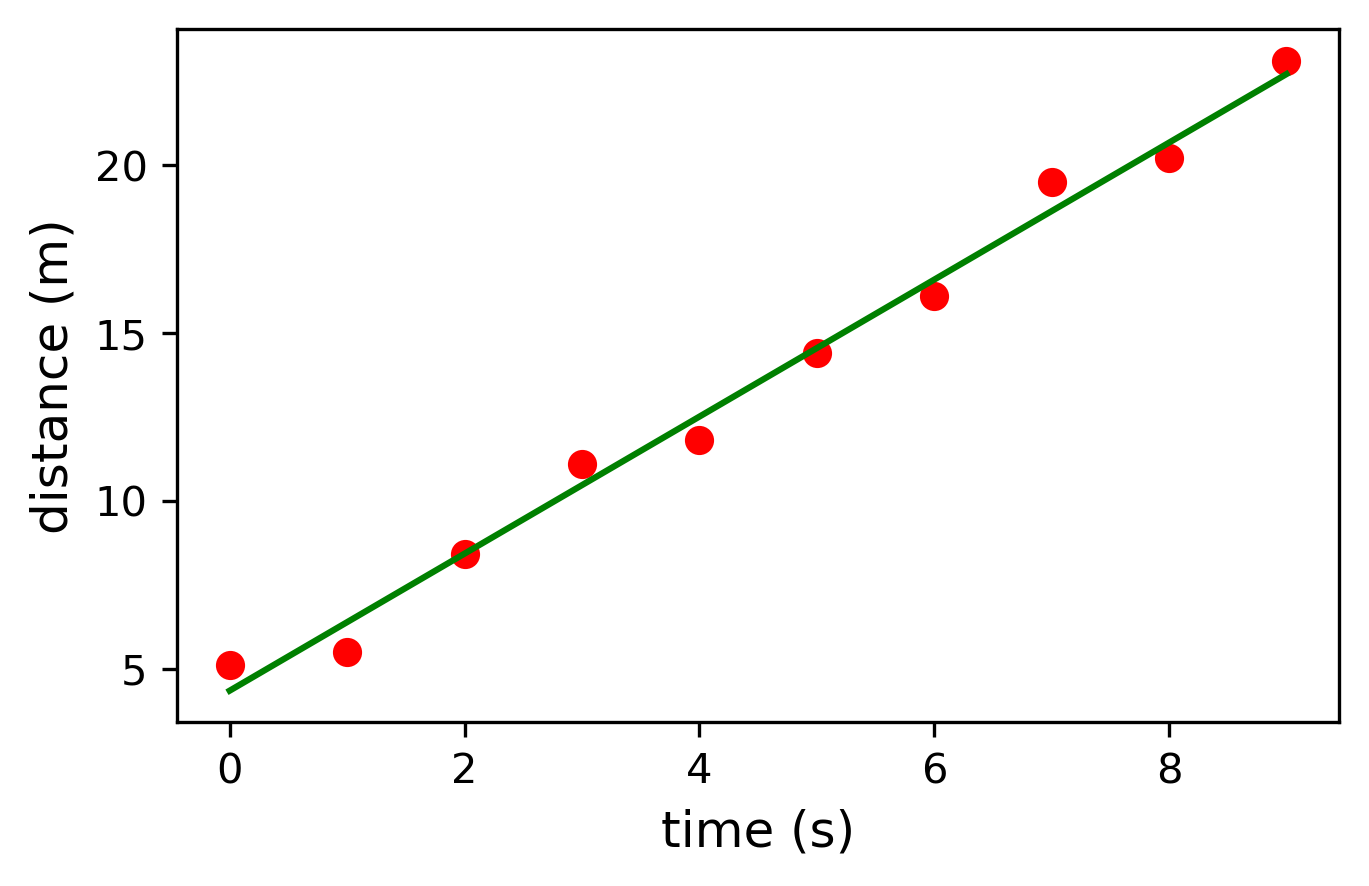

In [182]:
plt.figure(figsize=(5,3))
plt.scatter(x,y, c = 'red')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.plot(x, bestm*x+bestb, c = 'g'); #grafique la recta con los mejores parámetros

Y si agregamos incerteza en la medición de distancias?

In [184]:
np.random.seed(10)

dy = np.random.randn(10)*np.sqrt(2) #agregamos incertezas aleatorias, el signo no importa

In [186]:
dy

array([ 1.88314769,  1.01155723, -2.18552605, -0.01185655,  0.87870176,
       -1.01835477,  0.37549009,  0.1535108 ,  0.006069  , -0.24692199])

Text(0, 0.5, 'distance (m)')

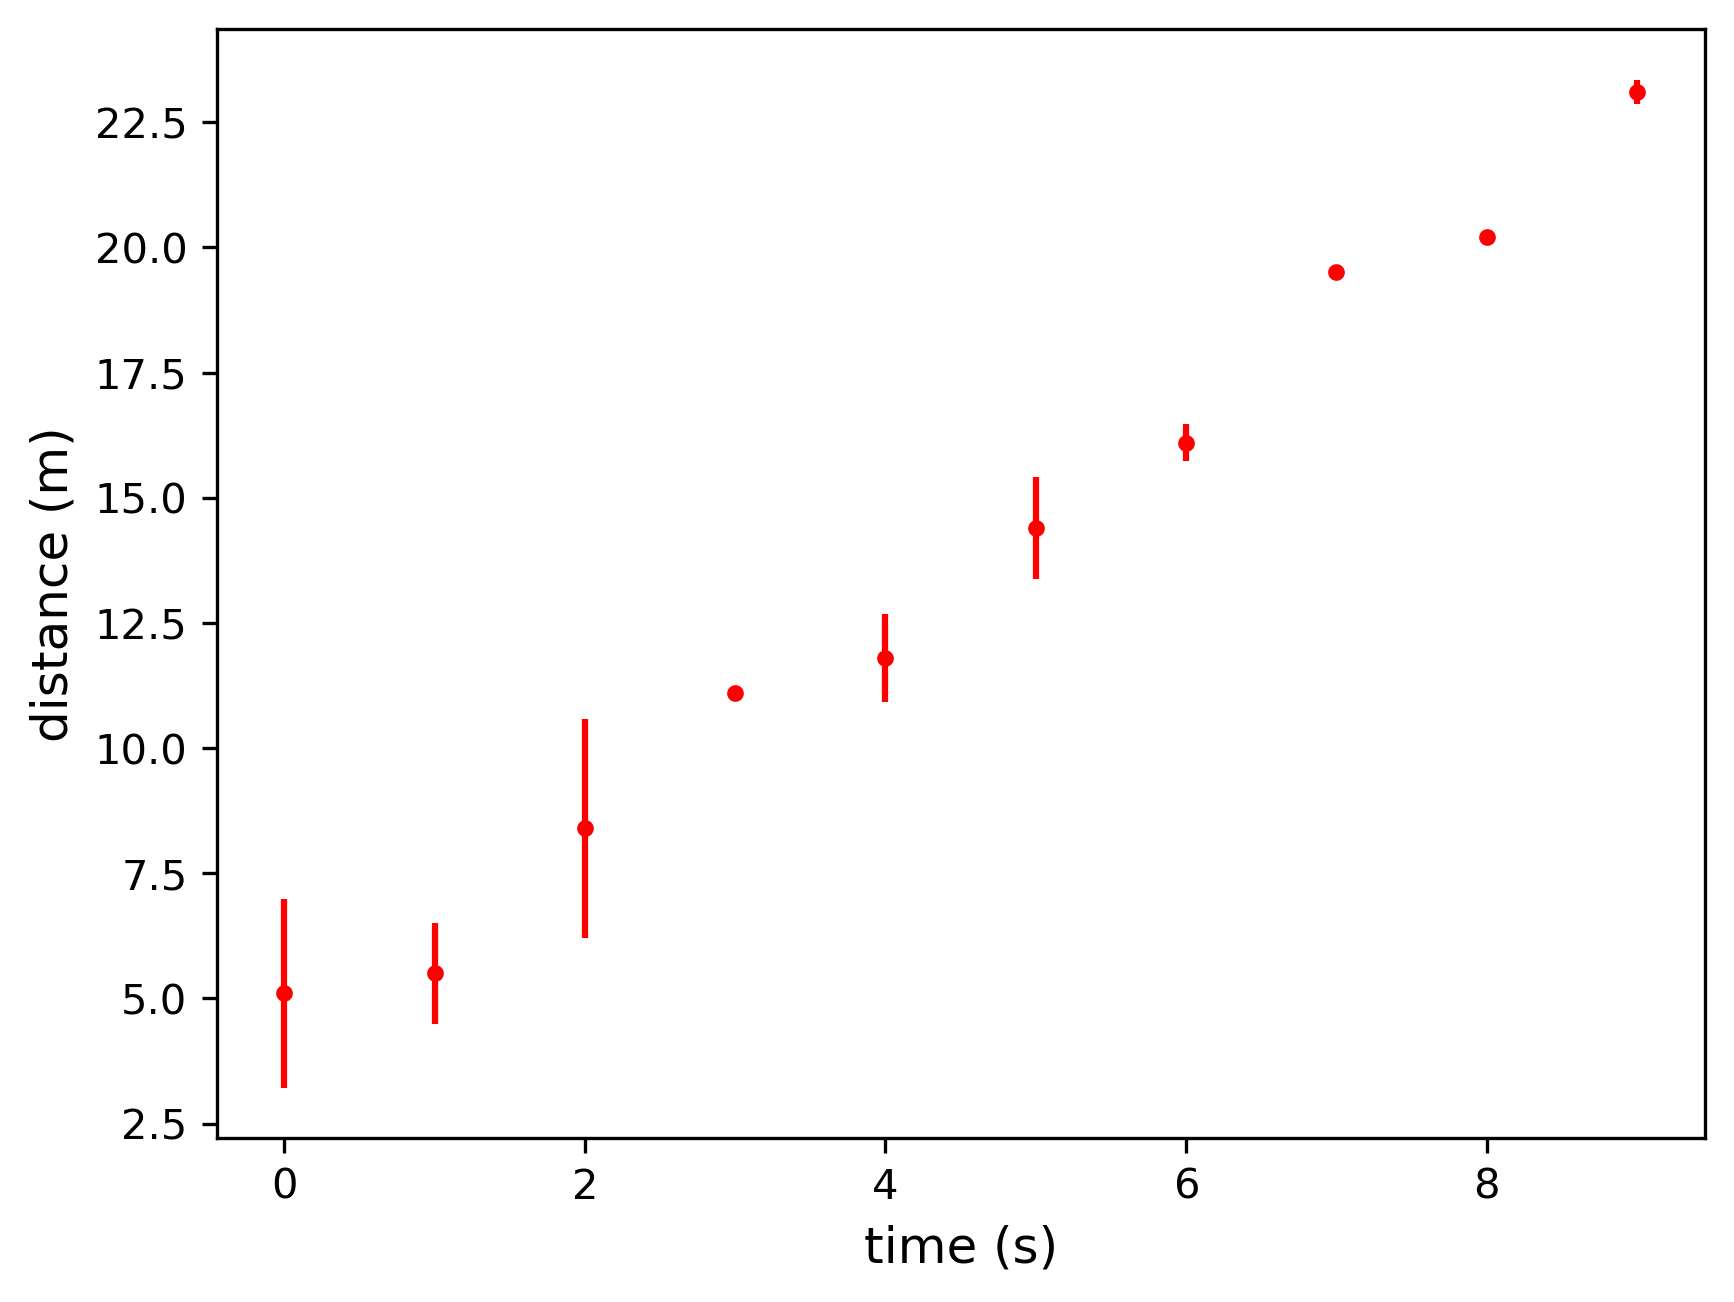

In [188]:
plt.errorbar(x,y, np.abs(dy), marker = 'o', markersize = 3, c = 'red', linestyle = ' ')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

Cuando agregamos incertezas, debemos considerar que datos con menor incerteza tienen más "peso". Para esto, modificaremos la función de error cuadrado con el inverso de los cuadrados de las distancias. Esto se conoce como distribución $\chi^2$ (likelihood)


In [192]:
def chi2(x,m,b,yobs,err):
    return np.sum(((yobs-model(x,m,b))**2)/err**2) # complete el modelo

Generamos el arreglo con la función de evaluación del modelo, y encontramos los índices del mínimo, igual que el ejemplo anterior.

In [195]:
allchi2 = np.array([[chi2(x,m,b,y,dy) for b in intercepts] for m in slopes]) 

In [197]:
print(allchi2.argmin()) 

indices = np.unravel_index(allchi2.argmin(), allchi2.shape) #tupla de indices  (fila, columna) 

4223


In [199]:
#pendiente e intercepto para el mejor modelo

bestm_werr, bestb_werr = slopes[indices[0]],intercepts[indices[1]]

In [203]:
bestm_werr, bestb_werr

(1.82, 5.640000000000001)

Graficamos los datos con incertezas y el nuevo ajuste

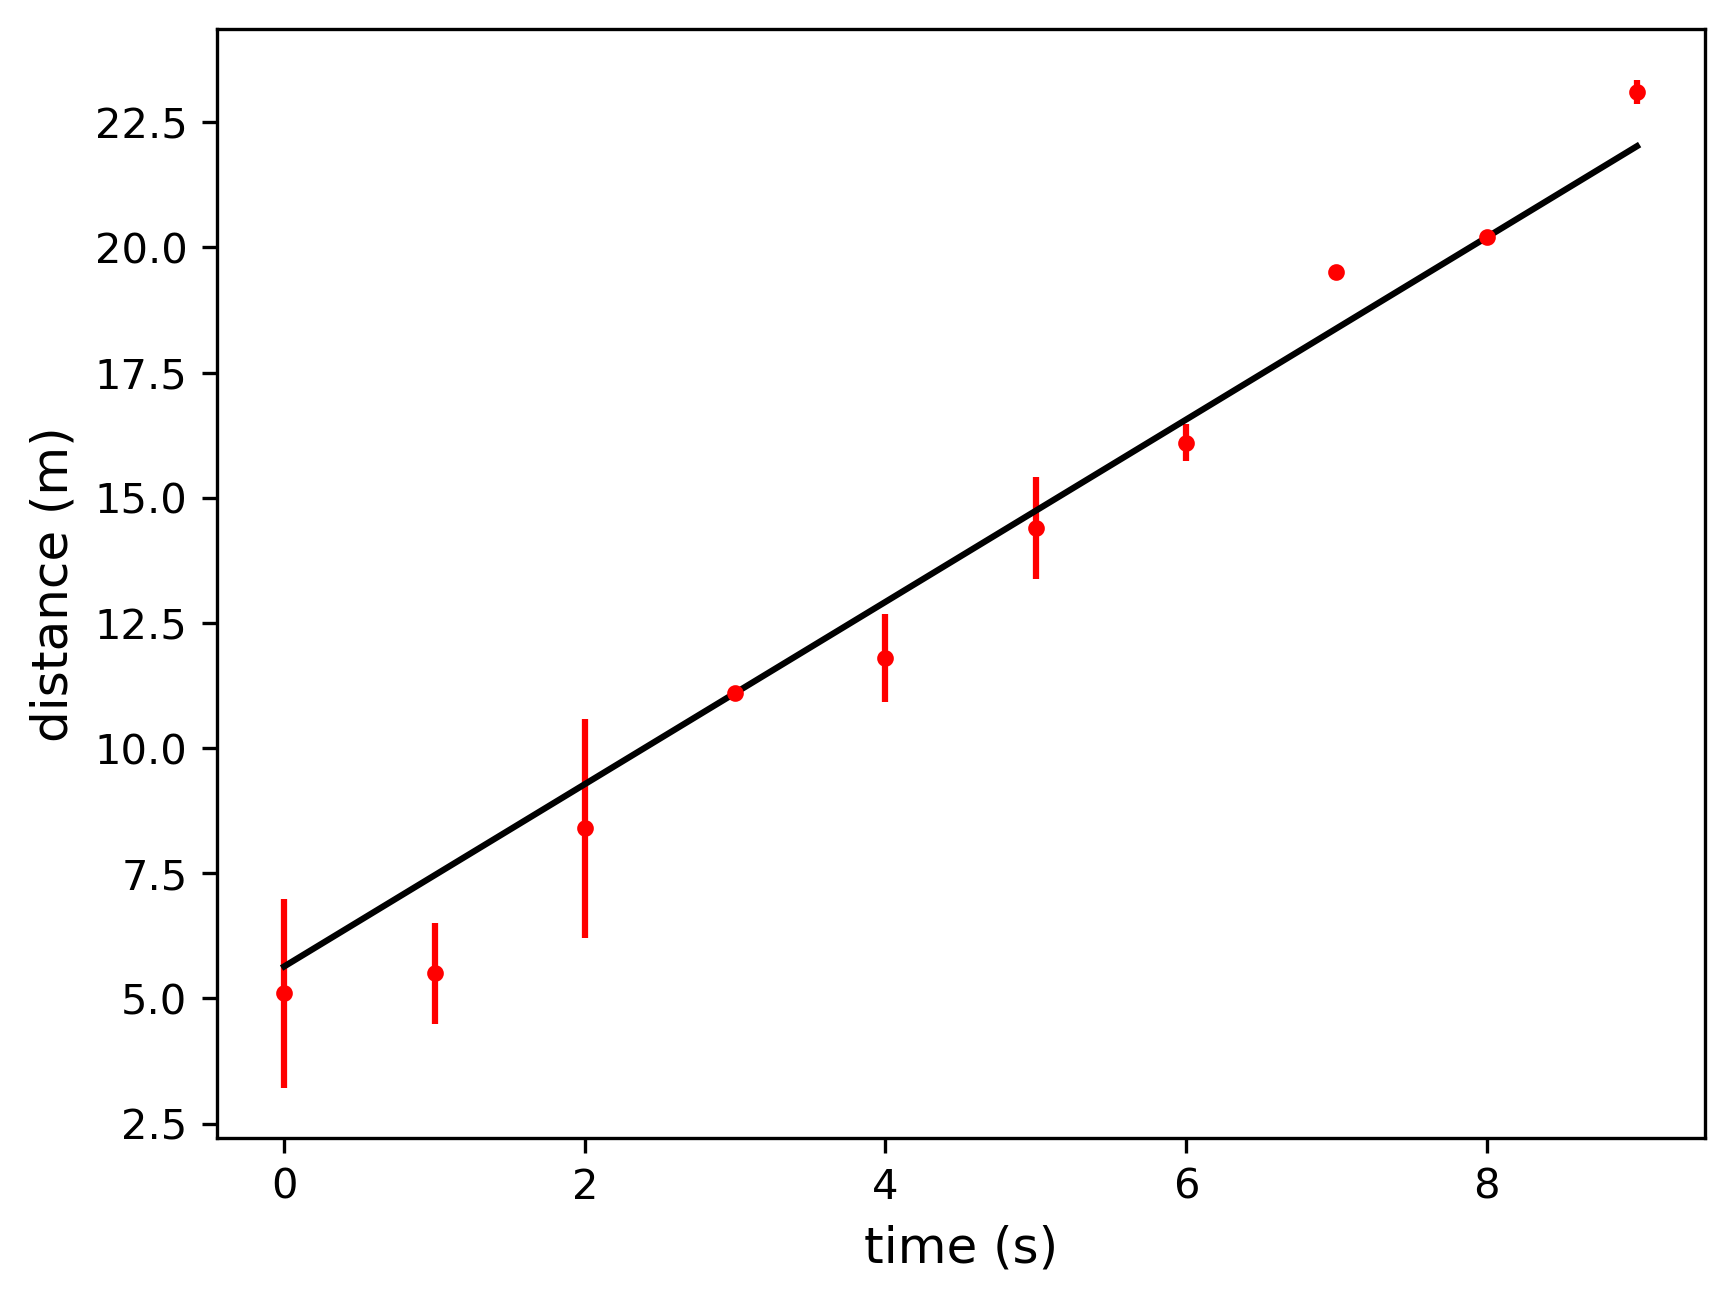

In [209]:
plt.errorbar(x,y, np.abs(dy), marker = 'o', markersize = 3, c = 'red', linestyle = ' ')
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.plot(x, bestb_werr + bestm_werr * x, c = 'black');

Comparemos ambos modelos

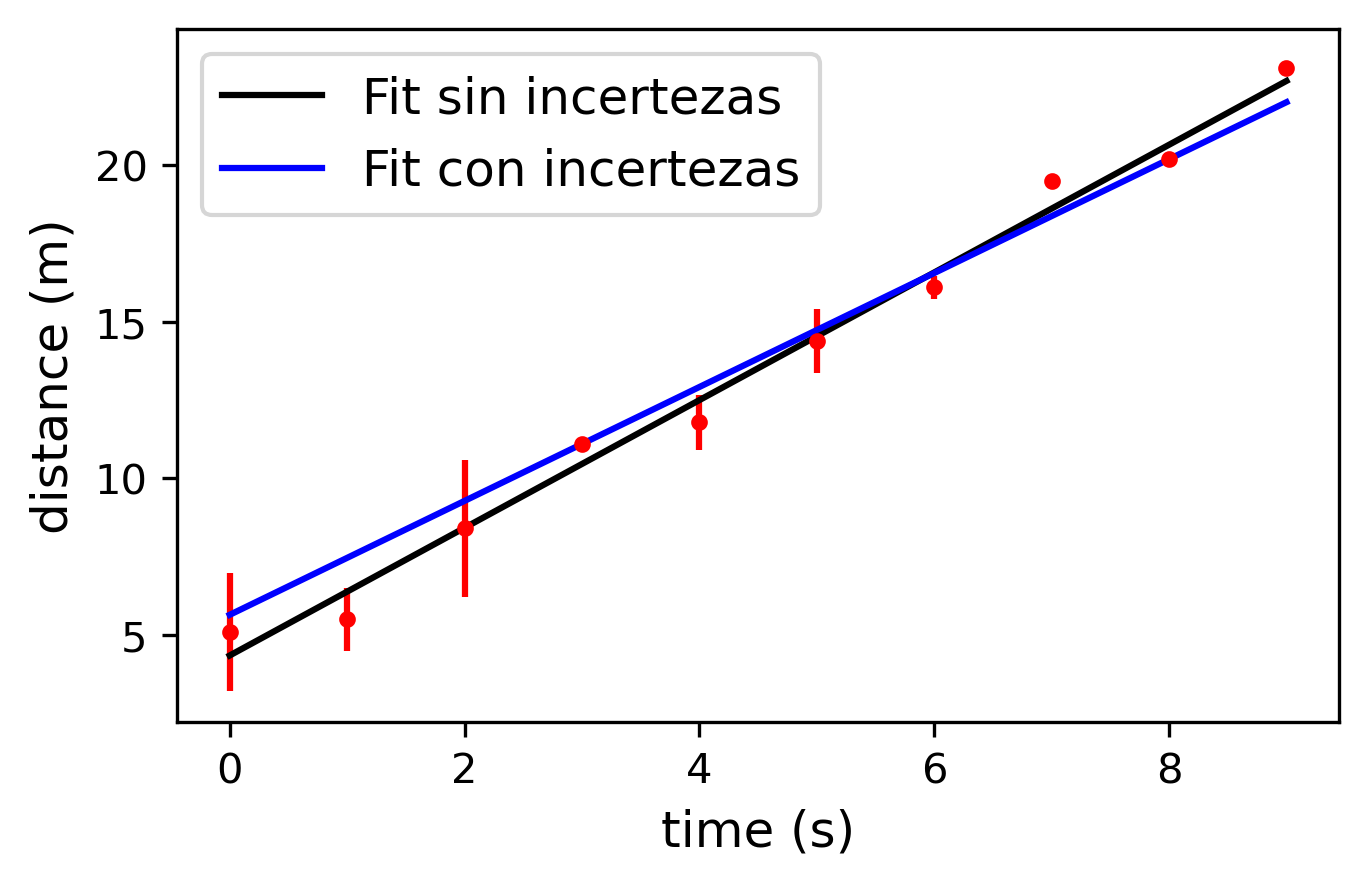

In [212]:
plt.figure(figsize=(5,3))

plt.errorbar(x,y, np.abs(dy), marker = 'o', markersize = 3, c = 'red', linestyle = ' ')

plt.plot(x, bestb + bestm * x, c = 'black', label = 'Fit sin incertezas')

plt.plot(x, bestb_werr + bestm_werr * x, c = 'b', label = 'Fit con incertezas')

plt.xlabel('time (s)')

plt.ylabel('distance (m)')

plt.legend();


**Pregunta: ¿Tiene sentido ese cambio?**

### Machine Learning

Si queremos resolver la pregunta de $d(t=12 s)=?$ usando aprendizaje de máquinas, la estrategia no es escribir explícitamente el modelo, ni los parámetros o el likelihood (aunque la elección de modelo sí afecta el resultado y la habilidad de aprender de los datos de entrenamiento).

En este caso, tenemos un problema de aprendizaje supervisado, donde nuestro set de datos inicial son los datos de aprendizaje. Debemos dividir estos datos en un conjunto de entrenamiento y prueba, de forma aleatoria (en el caso de una serie de tiempo esto no es verdad, pero en este caso no importa).

Consideraremos que nuestro problema es de regresión, porque la variable "target" es continua. Probaremos con dos modelos muy simples: Regresión lineal y Árbol de Decisión.

#### Importamos de la librería Sci-kit learn los modelos ya implementados y usaremos funciones de la librería para separar los datos en entrenamiento y prueba a partir de nuestros datos de distancia y tiempo creados al inicio del notebook

In [ ]:
#!pip install scikit-learn

In [214]:
from sklearn.tree import DecisionTreeRegressor #modelo de árbol de decisión

In [216]:
from sklearn.linear_model import LinearRegression #modelo de regresión lineal

In [218]:
from sklearn.model_selection import train_test_split  #para dividir los datos

In [222]:
y

array([ 5.1,  5.5,  8.4, 11.1, 11.8, 14.4, 16.1, 19.5, 20.2, 23.1])

In [224]:
np.random.seed(10) #semilla fija para reproducibilidad

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=3) #crea los sets de entrenamiento/prueba

In [226]:
X_train, y_train #7 datos de entrenamiento

(array([6, 3, 1, 0, 7, 4, 9]),
 array([16.1, 11.1,  5.5,  5.1, 19.5, 11.8, 23.1]))

In [228]:
X_test, y_test # 3 de prueba

(array([8, 2, 5]), array([20.2,  8.4, 14.4]))

In [230]:
treemodel = DecisionTreeRegressor() # Objeto "Estimator" de sklearn, con default params

In [232]:
regmodel = LinearRegression() # Objeto "Estimator" de sklearn, con default params default params

In [236]:
treemodel.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

construimos el modelo con los datos de entrenamiento y los usamos para predecir el output en los datos de prueba

In [238]:
#predicciones de datos usando árbol de decisión
y_pred_tree = treemodel.fit(X_train.reshape(-1, 1), y_train).predict(X_test.reshape(-1, 1))

In [240]:
#predicción usando regresión lineal
y_pred_reg = regmodel.fit(X_train.reshape(-1, 1), y_train).predict(X_test.reshape(-1, 1))

In [242]:
print(y_test, y_pred_reg, y_pred_tree) #Real/predicho por RL y AD respectivamente

[20.2  8.4 14.4] [20.89279279  8.41981982 14.65630631] [19.5  5.5 11.8]


Usaremos como métrica de evaluación los errores cuadrados promedio (MSE) para cada modelo

In [245]:
np.mean((y_test-y_pred_reg)**2)

0.18201586721857252

In [247]:
np.mean((y_test-y_pred_tree)**2)

5.22

**Pregunta: ¿Cuál modelo es mejor, RL o AD?**

Usamos el resultado para predecir $t = 12$ s con cada modelo

In [249]:
print(treemodel.predict(np.array(12).reshape(-1, 1)))
print(regmodel.predict(np.array(12).reshape(-1, 1)))

[23.1]
[29.20810811]


### Conclusión

Finalmente, cuál de las dos estrategias funcionó mejor, inferencia o ML?

- Hubiera funcionado la inferencia estadística si hubiéramos usando un modelo distinto (e.g sinusoidal)?
- En el caso de ML, cómo elegimos el mejor modelo?


**¿Cuál funciona mejor?**
- Mejor para Interpretabilidad: Si el objetivo es entender las relaciones entre variables y poder explicar esas relaciones de manera clara y comprensible, la inferencia estadística puede ser más adecuada. Esto es común en estudios científicos donde la interpretabilidad es clave.

- Mejor para Predicción: Si el objetivo es lograr la mejor precisión predictiva posible, especialmente con datos complejos y de gran escala, los métodos de aprendizaje automático tienden a ser más efectivos. Modelos como árboles de decisión, random forests, y redes neuronales suelen superar a los modelos estadísticos clásicos en tareas predictivas.

- Contexto del Problema: En problemas donde se necesita tanto interpretación como precisión, puede ser útil usar ambos enfoques. Por ejemplo, comenzar con modelos de inferencia para explorar los datos y entender las relaciones básicas, y luego usar ML para optimizar la precisión predictiva.